# Khám phá dữ liệu Movies Dataset - Revenue Prediction

Phân tích chi tiết tập dữ liệu phim với các biến như ngân sách, doanh thu, thời lượng, rating, v.v.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Cấu hình hiển thị
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 6)

## 1. Tải dữ liệu

In [2]:
# Tải dữ liệu từ file CSV
df = pd.read_csv('data/raw/movies_dataset_revenue.csv')

print(f"Kích thước dữ liệu: {df.shape}")
print(f"\nTên các cột: {df.columns.tolist()}")
print(f"\nDữ liệu 5 dòng đầu tiên:")
df.head()

Kích thước dữ liệu: (11187, 17)

Tên các cột: ['id', 'title', 'release_date', 'budget', 'revenue', 'runtime', 'rating', 'vote_count', 'popularity', 'genres', 'production_companies', 'production_countries', 'director', 'cast', 'keywords', 'original_language', 'collection']

Dữ liệu 5 dòng đầu tiên:


,id,title,release_date,budget,revenue,runtime,rating,vote_count,popularity,genres,production_companies,production_countries,director,cast,keywords,original_language,collection
0,8358,Cast Away,2000-12-22,90000000,429632142,143,7.660,11912,7.0546,"Adventure, Drama","20th Century Fox, DreamWorks Pictures, ImageMovers, Playtone",United States of America,Robert Zemeckis,"Tom Hanks, Helen Hunt, Chris Noth, Paul Sanchez, Lari White","exotic island, suicide attempt, volleyball, survival, loneliness, airplane crash, deserted island, tropical island, intense, bold, melodramatic",en,NaN
1,10567,Dinosaur,2000-05-19,127500000,354248063,82,6.548,2660,6.7356,"Animation, Family, Adventure, Drama","Walt Disney Feature Animation, The Secret Lab",United States of America,"Ralph Zondag, Eric Leighton","D. B. Sweeney, Alfre Woodard, Ossie Davis, Max Casella, Hayden Panettiere","cataclysm, asteroid, villain, comet, migration, prehistory, prehistoric creature, dinosaur, birth, death, nesting grounds, cavern, lemur, mesozoic",en,NaN
2,98,Gladiator,2000-05-04,103000000,465516248,155,8.220,20234,16.4449,"Action, Drama, Adventure","Universal Pictures, Scott Free Productions, Red Wagon Entertainment, Mill Film, DreamWorks Pictures","United Kingdom, United States of America",Ridley Scott,"Russell Crowe, Joaquin Phoenix, Connie Nielsen, Oliver Reed, Richard Harris","gladiator, rome, italy, arena, senate, roman empire, parent child relationship, emperor, slavery, ancient rome, revenge, battlefield, slave auction, historical fiction, ancient world, combat, chariot, philosopher, barbarian horde, 2nd century, successor, commodus, maximus, serene, defiant, gladiador",en,Gladiator Collection
3,8871,How the Grinch Stole Christmas,2000-11-17,123000000,345800000,104,6.775,7940,25.2338,"Family, Comedy, Fantasy","Universal Pictures, Imagine Entertainment, LUNI Productions, Dr. Seuss Enterprises","Germany, United States of America",Ron Howard,"Jim Carrey, Taylor Momsen, Jeffrey Tambor, Christine Baranski, Bill Irwin","new love, based on novel or book, holiday, christmas party, village, santa claus, surrealism, thief, public humiliation, christmas, surreal world",en,NaN
4,3981,What Women Want,2000-12-15,70000000,374100000,127,6.444,4178,9.4122,"Comedy, Romance","Paramount Pictures, Icon Productions, Wind Dancer Films",United States of America,Nancy Meyers,"Mel Gibson, Helen Hunt, Marisa Tomei, Alan Alda, Ashley Johnson","telepathy, romcom, womanizer, single father, super power, teenage daughter, misogyny, advertising executive, woman director, female psyche, romantic, amused, appreciative",en,NaN


## 2. Thông tin chung về dữ liệu

In [3]:
# Thông tin chi tiết về kiểu dữ liệu và giá trị null
print("Thông tin kiểu dữ liệu:")
print(df.info())
print("\n" + "="*80)
print("Số lượng giá trị NULL:")
print(df.isnull().sum())
print("\n" + "="*80)
print("Thống kê mô tả dữ liệu số:")
df.describe()

Thông tin kiểu dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11187 entries, 0 to 11186
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    11187 non-null  int64  
 1   title                 11187 non-null  object 
 2   release_date          11187 non-null  object 
 3   budget                11187 non-null  int64  
 4   revenue               11187 non-null  int64  
 5   runtime               11187 non-null  int64  
 6   rating                11187 non-null  float64
 7   vote_count            11187 non-null  int64  
 8   popularity            11187 non-null  float64
 9   genres                11185 non-null  object 
 10  production_companies  10954 non-null  object 
 11  production_countries  11129 non-null  object 
 12  director              11187 non-null  object 
 13  cast                  11169 non-null  object 
 14  keywords              9697 non-null   object 


,id,budget,revenue,runtime,rating,vote_count,popularity
count,1.118700e+04,1.118700e+04,1.118700e+04,11187.000000,11187.000000,11187.000000,11187.000000
mean,2.930767e+05,1.854582e+07,5.386281e+07,107.452221,6.343121,1353.538125,3.968208
std,3.234414e+05,3.769270e+07,1.469002e+08,21.311167,0.896607,2972.537988,7.118688
min,1.200000e+01,0.000000e+00,1.000000e+00,0.000000,1.700000,10.000000,0.035500
25%,2.281450e+04,0.000000e+00,1.010462e+06,94.000000,5.803000,67.000000,1.783350
50%,1.498930e+05,3.009565e+06,6.625303e+06,104.000000,6.400000,274.000000,3.148700
75%,4.818635e+05,2.000000e+07,3.717348e+07,118.000000,6.966000,1183.000000,4.970350
max,1.396558e+06,5.839000e+08,2.923706e+09,367.000000,9.043000,38267.000000,558.928600


## 3. Phân tích các biến số chính

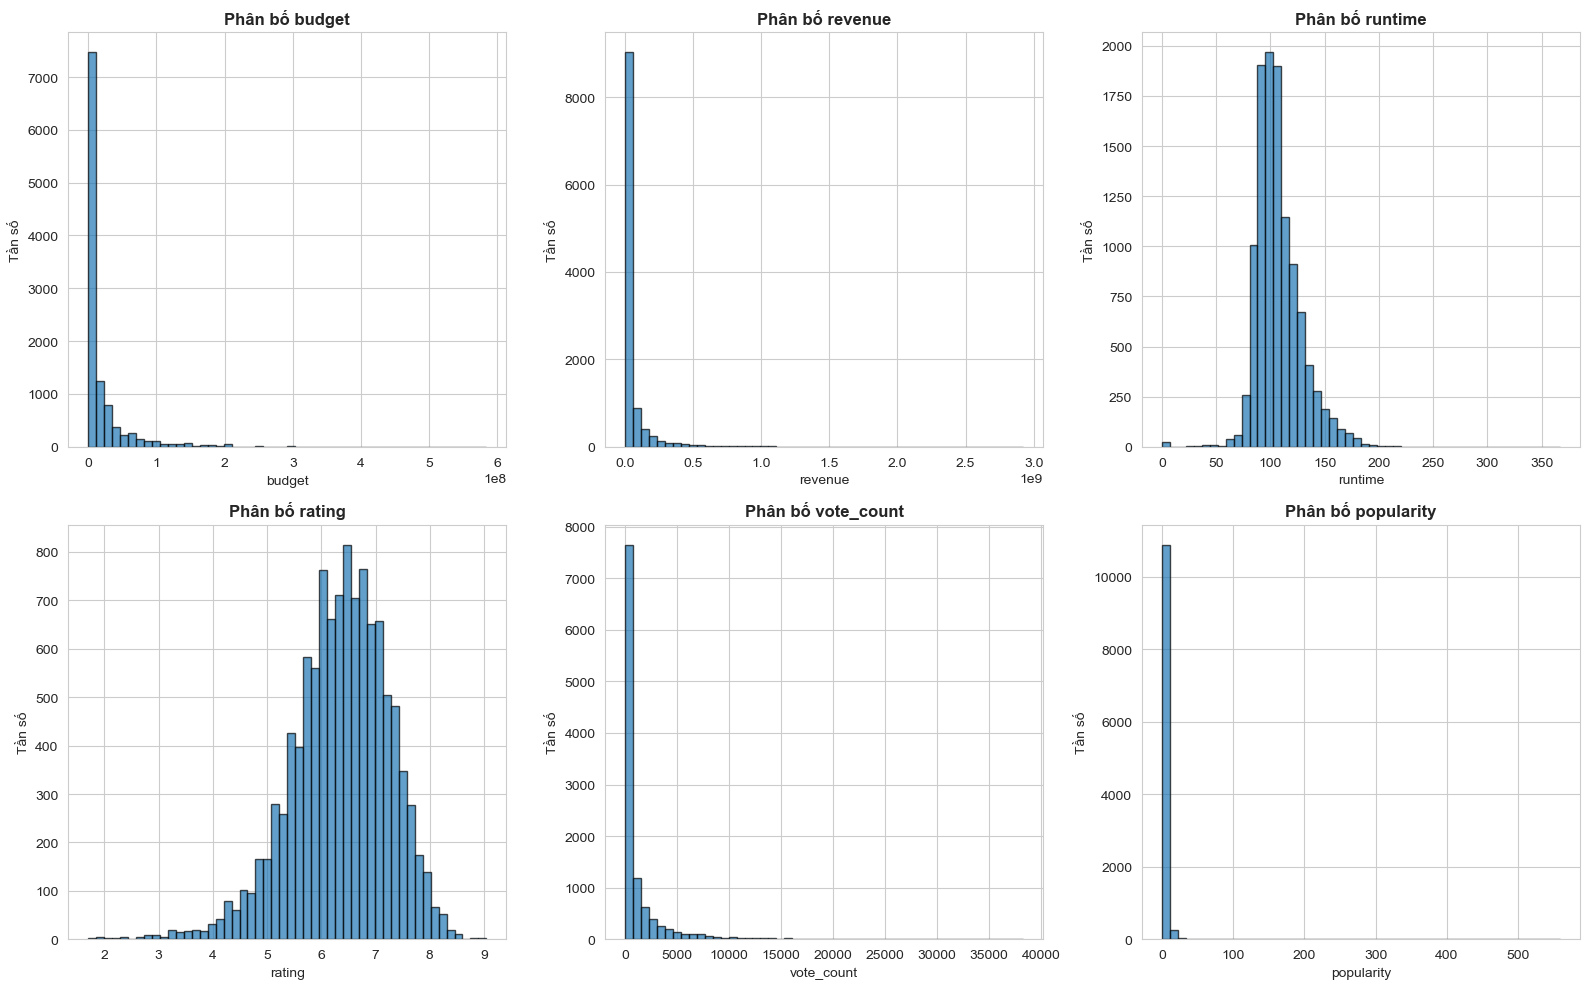

Thống kê chi tiết cho các biến số:

BUDGET:
  - Min: 0
  - Max: 583,900,000
  - Mean: 18,545,819
  - Median: 3,009,565
  - Std Dev: 37,692,698
  - Null values: 0

REVENUE:
  - Min: 1
  - Max: 2,923,706,026
  - Mean: 53,862,811
  - Median: 6,625,303
  - Std Dev: 146,900,219
  - Null values: 0

RUNTIME:
  - Min: 0
  - Max: 367
  - Mean: 107
  - Median: 104
  - Std Dev: 21
  - Null values: 0

RATING:
  - Min: 2
  - Max: 9
  - Mean: 6
  - Median: 6
  - Std Dev: 1
  - Null values: 0

VOTE_COUNT:
  - Min: 10
  - Max: 38,267
  - Mean: 1,354
  - Median: 274
  - Std Dev: 2,973
  - Null values: 0

POPULARITY:
  - Min: 0
  - Max: 559
  - Mean: 4
  - Median: 3
  - Std Dev: 7
  - Null values: 0


In [3]:
# Phân tích chi tiết các biến số
numerical_cols = ['budget', 'revenue', 'runtime', 'rating', 'vote_count', 'popularity']

# Tạo ma trận các đồ thị phân bố
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.ravel()

for idx, col in enumerate(numerical_cols):
    if col in df.columns:
        axes[idx].hist(df[col].dropna(), bins=50, edgecolor='black', alpha=0.7)
        axes[idx].set_title(f'Phân bố {col}', fontsize=12, fontweight='bold')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Tần số')

plt.tight_layout()
plt.show()

# Thống kê chi tiết
print("Thống kê chi tiết cho các biến số:")
for col in numerical_cols:
    if col in df.columns:
        print(f"\n{col.upper()}:")
        print(f"  - Min: {df[col].min():,.0f}")
        print(f"  - Max: {df[col].max():,.0f}")
        print(f"  - Mean: {df[col].mean():,.0f}")
        print(f"  - Median: {df[col].median():,.0f}")
        print(f"  - Std Dev: {df[col].std():,.0f}")
        print(f"  - Null values: {df[col].isnull().sum()}")

## 4. Mối quan hệ giữa các biến số

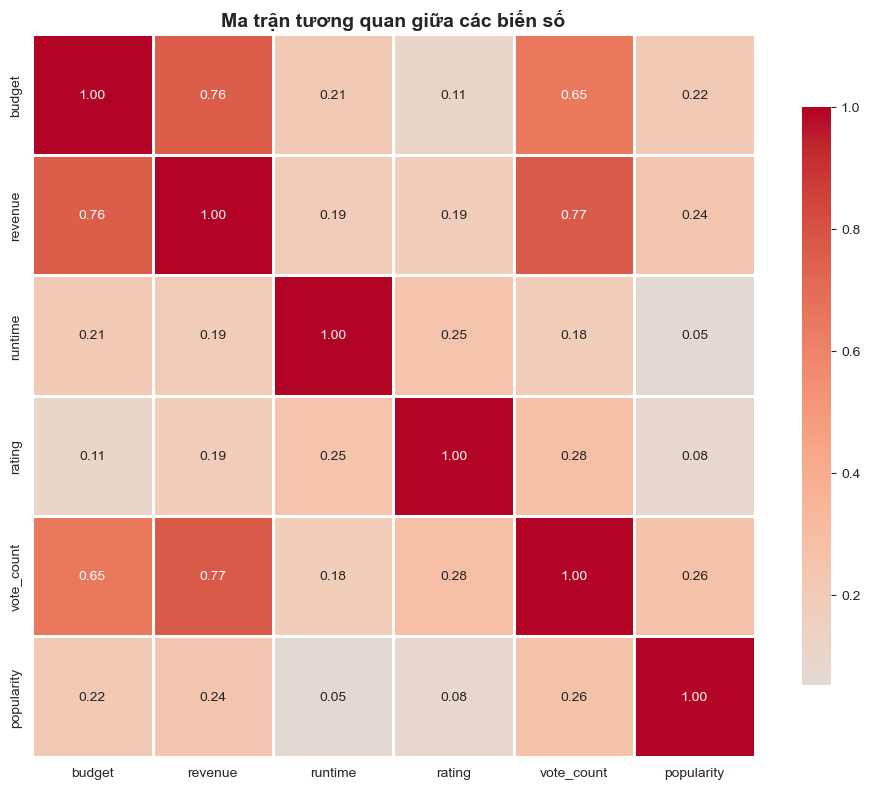

Ma trận tương quan:
              budget   revenue   runtime    rating  vote_count  popularity
budget      1.000000  0.757128  0.213226  0.111779    0.653746    0.217697
revenue     0.757128  1.000000  0.192318  0.189311    0.765984    0.243258
runtime     0.213226  0.192318  1.000000  0.252936    0.182955    0.052731
rating      0.111779  0.189311  0.252936  1.000000    0.282172    0.082236
vote_count  0.653746  0.765984  0.182955  0.282172    1.000000    0.261392
popularity  0.217697  0.243258  0.052731  0.082236    0.261392    1.000000


In [4]:
# Ma trận tương quan
correlation_cols = ['budget', 'revenue', 'runtime', 'rating', 'vote_count', 'popularity']
correlation_cols = [col for col in correlation_cols if col in df.columns]

corr_matrix = df[correlation_cols].corr()

# Vẽ heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8},
            fmt='.2f')
plt.title('Ma trận tương quan giữa các biến số', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("Ma trận tương quan:")
print(corr_matrix)

## 5. Mối quan hệ giữa Budget và Revenue (biến quan trọng nhất)

Số phim có cả budget và revenue: 6930 / 11187


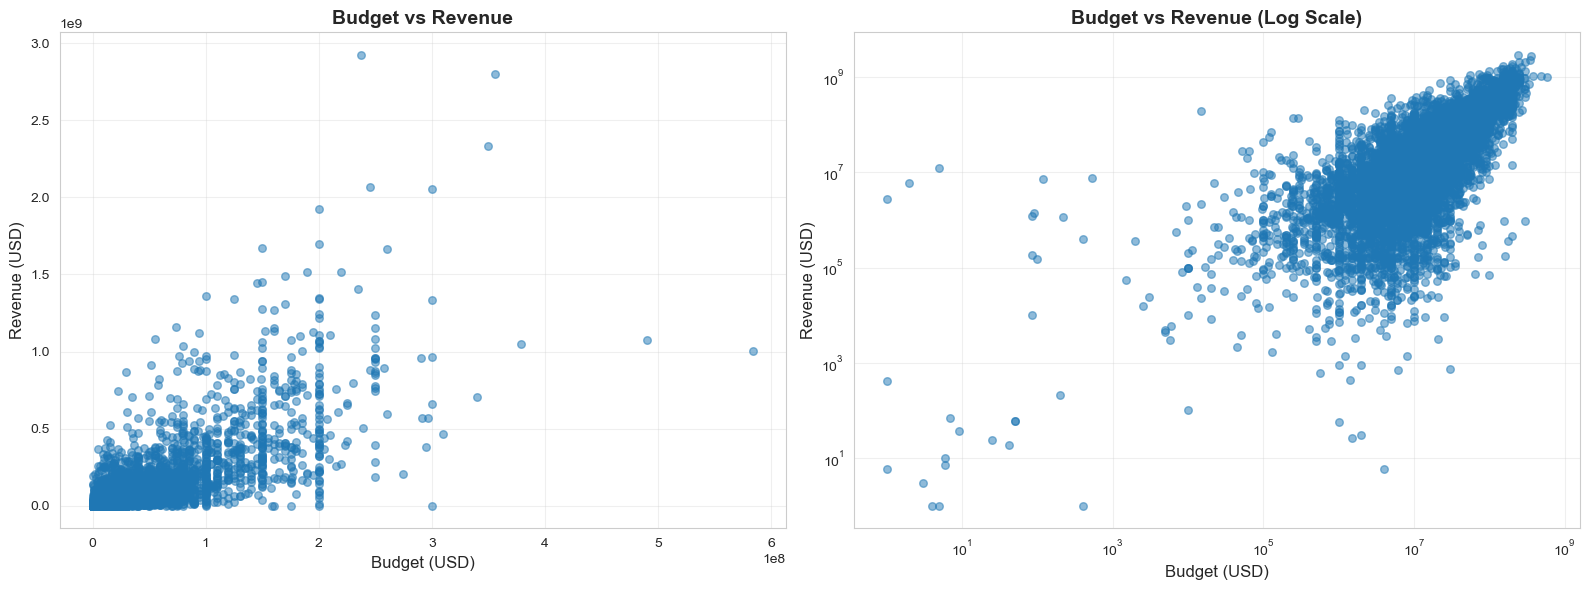


Thống kê ROI:
  - Min ROI: -100.00%
  - Max ROI: 300000250.00%
  - Mean ROI: 120662.01%
  - Median ROI: 58.56%

Top 5 phim có ROI cao nhất:
                                                   title  budget   revenue  \
4202                              Oy Vey! My Son Is Gay!       2   6000007   
5253                                          Between Us       1   2755584   
7164  The Beatles: Eight Days a Week - The Touring Years       5  12283800   
9872                                  Letters to Santa 5     119   7328061   
1904                           The Notorious Bettie Page      90   1410778   

               ROI  
4202  3.000002e+08  
5253  2.755583e+08  
7164  2.456759e+08  
9872  6.157934e+06  
1904  1.567431e+06  


In [8]:
# Trước tiên chuyển đổi release_date sang datetime để có cột 'year'
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['year'] = df['release_date'].dt.year

# Lọc dữ liệu có giá trị budget và revenue
df_valid = df[(df['budget'] > 0) & (df['revenue'] > 0)].copy()

print(f"Số phim có cả budget và revenue: {len(df_valid)} / {len(df)}")

# Vẽ scatter plot
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Scatter plot ban đầu
axes[0].scatter(df_valid['budget'], df_valid['revenue'], alpha=0.5, s=30)
axes[0].set_xlabel('Budget (USD)', fontsize=12)
axes[0].set_ylabel('Revenue (USD)', fontsize=12)
axes[0].set_title('Budget vs Revenue', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Scatter plot với log scale
axes[1].scatter(df_valid['budget'], df_valid['revenue'], alpha=0.5, s=30)
axes[1].set_xlabel('Budget (USD)', fontsize=12)
axes[1].set_ylabel('Revenue (USD)', fontsize=12)
axes[1].set_title('Budget vs Revenue (Log Scale)', fontsize=14, fontweight='bold')
axes[1].set_xscale('log')
axes[1].set_yscale('log')
axes[1].grid(True, alpha=0.3, which='both')

plt.tight_layout()
plt.show()

# Tính toán ROI (Return on Investment)
df_valid['ROI'] = (df_valid['revenue'] - df_valid['budget']) / df_valid['budget'] * 100

print(f"\nThống kê ROI:")
print(f"  - Min ROI: {df_valid['ROI'].min():.2f}%")
print(f"  - Max ROI: {df_valid['ROI'].max():.2f}%")
print(f"  - Mean ROI: {df_valid['ROI'].mean():.2f}%")
print(f"  - Median ROI: {df_valid['ROI'].median():.2f}%")

# Phim có ROI cao nhất
print(f"\nTop 5 phim có ROI cao nhất:")
print(df_valid.nlargest(5, 'ROI')[['title', 'budget', 'revenue', 'ROI']])

## 6. Phân tích Genres

Top 15 genres phổ biến nhất:
  Drama: 5510 phim
  Comedy: 4028 phim
  Thriller: 2480 phim
  Action: 2412 phim
  Romance: 1930 phim
  Adventure: 1706 phim
  Crime: 1482 phim
  Horror: 1246 phim
  Family: 1184 phim
  Fantasy: 1103 phim
  Animation: 977 phim
  Science Fiction: 910 phim
  Mystery: 882 phim
  History: 658 phim
  Documentary: 397 phim


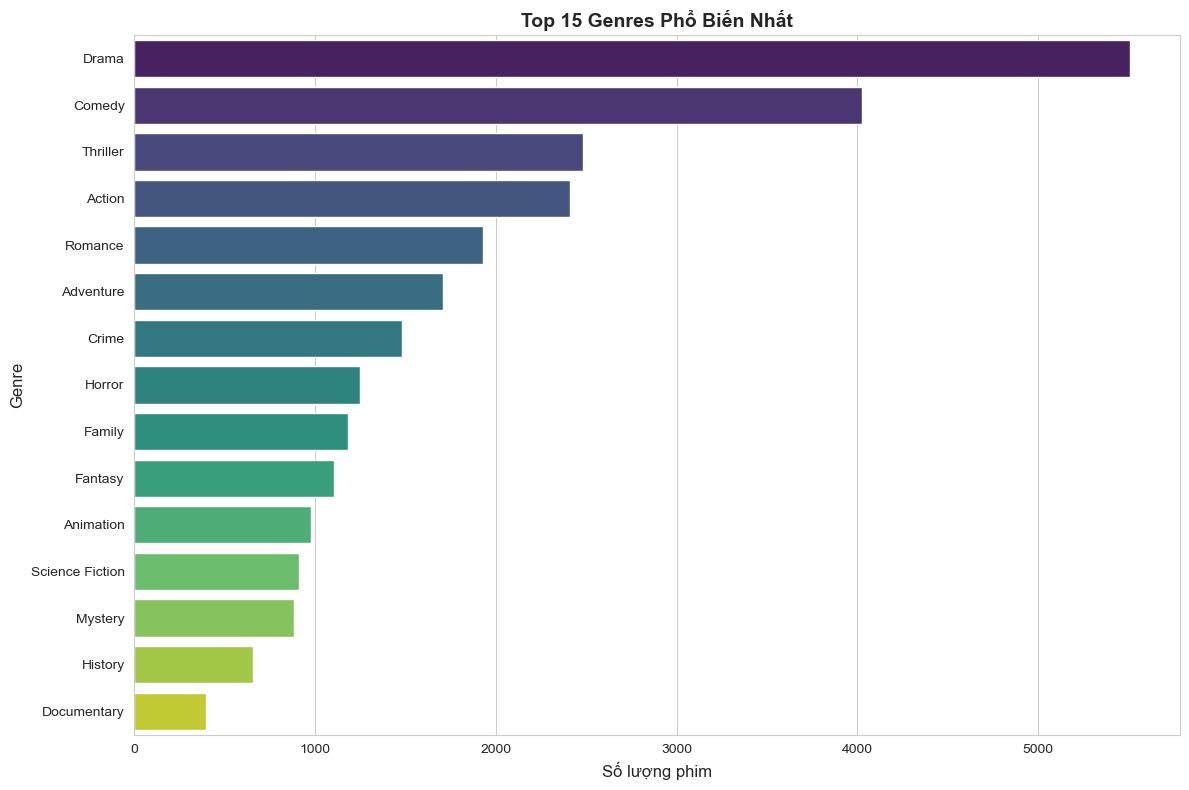

In [9]:
# Phân tích genres
from collections import Counter

# Tách genres
genres_list = []
for genres_str in df['genres'].dropna():
    if isinstance(genres_str, str):
        genres = [g.strip() for g in genres_str.split(',')]
        genres_list.extend(genres)

# Đếm tần số
genres_count = Counter(genres_list)

print("Top 15 genres phổ biến nhất:")
for genre, count in genres_count.most_common(15):
    print(f"  {genre}: {count} phim")

# Vẽ biểu đồ
genres_df = pd.DataFrame(list(genres_count.most_common(15)), 
                         columns=['Genre', 'Count'])

plt.figure(figsize=(12, 8))
sns.barplot(data=genres_df, x='Count', y='Genre', hue='Genre', palette='viridis', legend=False)
plt.title('Top 15 Genres Phổ Biến Nhất', fontsize=14, fontweight='bold')
plt.xlabel('Số lượng phim', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.tight_layout()
plt.show()

## 7. Phân tích theo thời gian (Release Date)

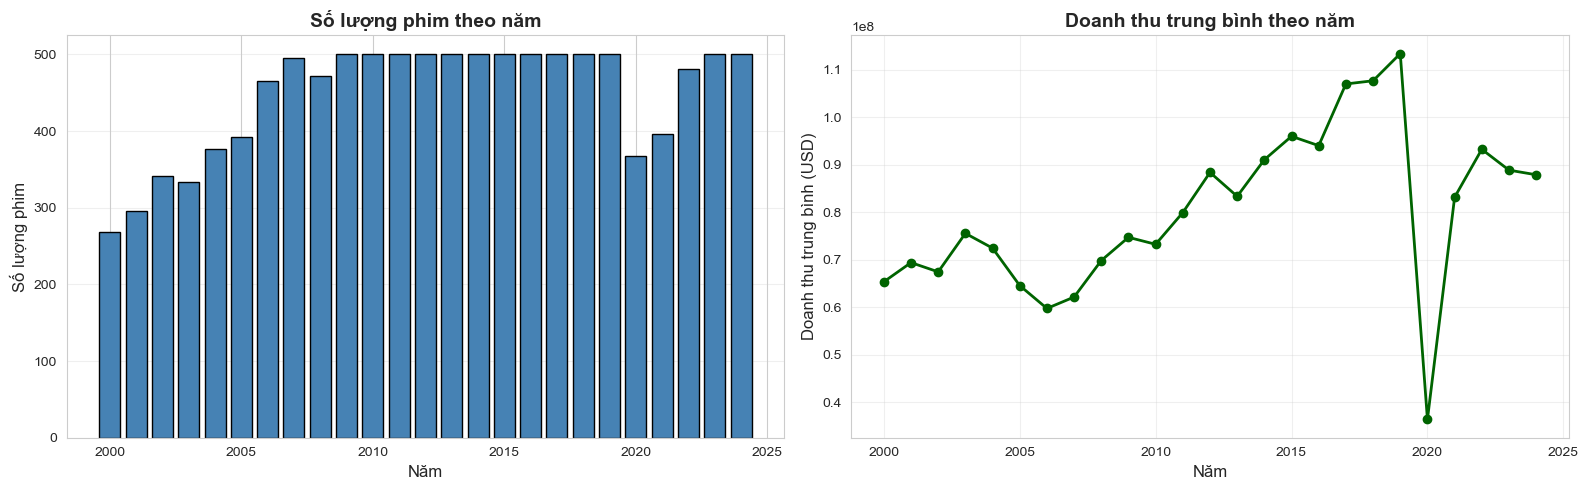

Số phim theo năm:
year
2000    268
2001    296
2002    342
2003    333
2004    377
2005    392
2006    466
2007    496
2008    472
2009    500
2010    500
2011    500
2012    500
2013    500
2014    500
2015    500
2016    500
2017    500
2018    500
2019    500
2020    368
2021    396
2022    481
2023    500
2024    500
dtype: int64


In [10]:
# Phim theo năm (release_date và year đã được xử lý trong cell trước)
movies_per_year = df.groupby('year').size()

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Số lượng phim theo năm
axes[0].bar(movies_per_year.index, movies_per_year.values, color='steelblue', edgecolor='black')
axes[0].set_xlabel('Năm', fontsize=12)
axes[0].set_ylabel('Số lượng phim', fontsize=12)
axes[0].set_title('Số lượng phim theo năm', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='y')

# Doanh thu trung bình theo năm
avg_revenue_per_year = df_valid.groupby('year')['revenue'].mean()
axes[1].plot(avg_revenue_per_year.index, avg_revenue_per_year.values, 
             marker='o', linewidth=2, markersize=6, color='darkgreen')
axes[1].set_xlabel('Năm', fontsize=12)
axes[1].set_ylabel('Doanh thu trung bình (USD)', fontsize=12)
axes[1].set_title('Doanh thu trung bình theo năm', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Số phim theo năm:")
print(movies_per_year)

## 8. Phân tích các phim hàng đầu

In [11]:
# Top 10 phim có doanh thu cao nhất
print("Top 10 phim có doanh thu cao nhất:")
top_revenue = df.nlargest(10, 'revenue')[['title', 'budget', 'revenue', 'rating', 'release_date']]
for idx, row in top_revenue.iterrows():
    print(f"{row['title']}: ${row['revenue']:,.0f}")

print("\n" + "="*80)

# Top 10 phim có ngân sách cao nhất
print("\nTop 10 phim có ngân sách cao nhất:")
top_budget = df.nlargest(10, 'budget')[['title', 'budget', 'revenue', 'rating', 'release_date']]
for idx, row in top_budget.iterrows():
    print(f"{row['title']}: ${row['budget']:,.0f}")

print("\n" + "="*80)

# Top 10 phim có rating cao nhất
print("\nTop 10 phim có rating cao nhất (với ít nhất 100 vote):")
df_rated = df[df['vote_count'] >= 100]
top_rated = df_rated.nlargest(10, 'rating')[['title', 'budget', 'revenue', 'rating', 'vote_count']]
for idx, row in top_rated.iterrows():
    print(f"{row['title']}: {row['rating']:.2f} (votes: {row['vote_count']:,.0f})")

Top 10 phim có doanh thu cao nhất:
Avatar: $2,923,706,026
Avengers: Endgame: $2,799,439,100
Avatar: The Way of Water: $2,330,224,914
Star Wars: The Force Awakens: $2,068,223,624
Avengers: Infinity War: $2,052,415,039
Spider-Man: No Way Home: $1,921,847,111
Inside Out 2: $1,698,863,816
Jurassic World: $1,671,537,444
The Lion King: $1,662,020,819
The Avengers: $1,518,815,515


Top 10 phim có ngân sách cao nhất:
Jurassic World Dominion: $583,900,000
Star Wars: The Rise of Skywalker: $489,900,000
Pirates of the Caribbean: On Stranger Tides: $379,000,000
Avengers: Endgame: $356,000,000
Avatar: The Way of Water: $350,000,000
Fast X: $340,000,000
Gladiator II: $310,000,000
Paprika: $300,000,000
Pirates of the Caribbean: At World's End: $300,000,000
Star Wars: The Last Jedi: $300,000,000


Top 10 phim có rating cao nhất (với ít nhất 100 vote):
Break the Silence: The Movie: 9.04 (votes: 186)
Attack on Titan: THE LAST ATTACK: 8.80 (votes: 131)
Spirited Away: 8.53 (votes: 17,655)
The Dark Knight:

## 9. Phân tích Missing Data và Data Quality

Phân tích Missing Data:
                                    Column  Missing_Count  Missing_Percentage
collection                      collection           8682               77.61
keywords                          keywords           1490               13.32
production_companies  production_companies            233                2.08
production_countries  production_countries             58                0.52
cast                                  cast             18                0.16
genres                              genres              2                0.02
title                                title              0                0.00
original_language        original_language              0                0.00
director                          director              0                0.00
id                                      id              0                0.00
popularity                      popularity              0                0.00
vote_count                      vote_cou

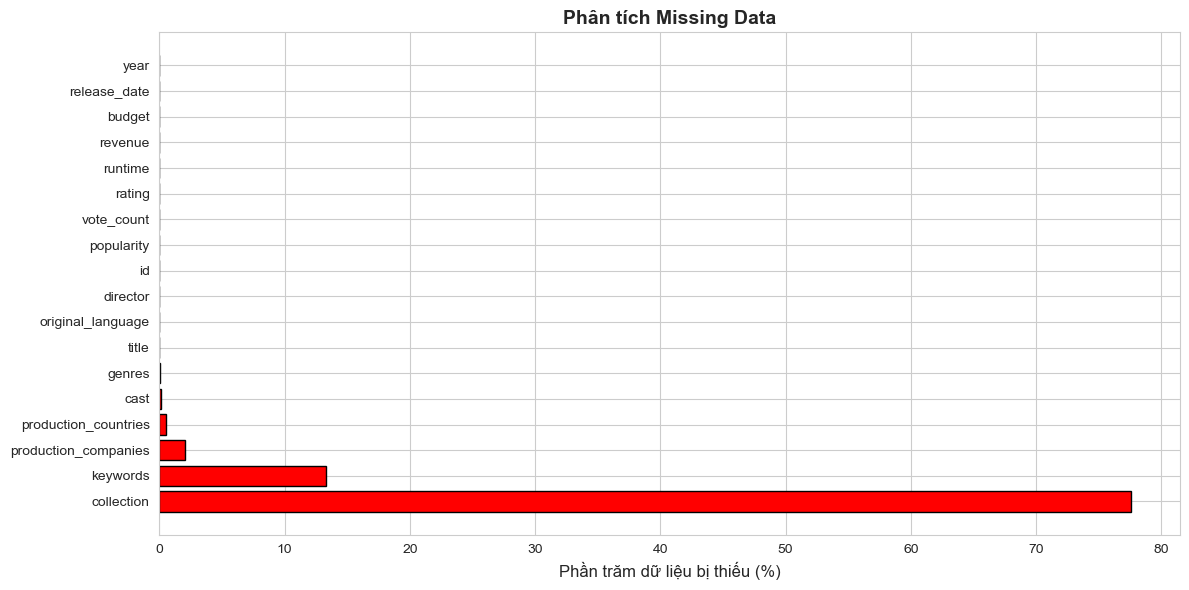


Phân tích dữ liệu hợp lệ:
- Phim có budget > 0: 6930 (61.95%)
- Phim có revenue > 0: 11187 (100.00%)
- Phim có cả budget và revenue > 0: 6930 (61.95%)
- Phim có rating > 0: 11187 (100.00%)


In [12]:
# Phân tích missing data
missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df) * 100).round(2)
})

missing_data = missing_data.sort_values('Missing_Percentage', ascending=False)

print("Phân tích Missing Data:")
print(missing_data)

# Vẽ biểu đồ missing data
plt.figure(figsize=(12, 6))
colors = ['red' if x > 0 else 'green' for x in missing_data['Missing_Percentage']]
plt.barh(missing_data['Column'], missing_data['Missing_Percentage'], color=colors, edgecolor='black')
plt.xlabel('Phần trăm dữ liệu bị thiếu (%)', fontsize=12)
plt.title('Phân tích Missing Data', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Phân tích dữ liệu hợp lệ
print("\n" + "="*80)
print("Phân tích dữ liệu hợp lệ:")
print(f"- Phim có budget > 0: {(df['budget'] > 0).sum()} ({(df['budget'] > 0).sum() / len(df) * 100:.2f}%)")
print(f"- Phim có revenue > 0: {(df['revenue'] > 0).sum()} ({(df['revenue'] > 0).sum() / len(df) * 100:.2f}%)")
print(f"- Phim có cả budget và revenue > 0: {len(df_valid)} ({len(df_valid) / len(df) * 100:.2f}%)")
print(f"- Phim có rating > 0: {(df['rating'] > 0).sum()} ({(df['rating'] > 0).sum() / len(df) * 100:.2f}%)")

## 10. Tóm tắt và Insight chính

In [13]:
print("="*80)
print("TÓM TẮT DỮ LIỆU MOVIES DATASET")
print("="*80)

print(f"\n📊 THÔNG TIN CHUNG:")
print(f"  - Tổng số phim: {len(df)}")
print(f"  - Năm phát hành: {df['year'].min():.0f} - {df['year'].max():.0f}")
print(f"  - Số lượng genres: {len(genres_count)}")

print(f"\n💰 THÔNG TIN NGÂN SÁCH VÀ DOANH THU:")
print(f"  - Phim có budget > 0: {(df['budget'] > 0).sum()} phim")
print(f"  - Phim có revenue > 0: {(df['revenue'] > 0).sum()} phim")
print(f"  - Budget trung bình: ${df[df['budget'] > 0]['budget'].mean():,.0f}")
print(f"  - Revenue trung bình: ${df[df['revenue'] > 0]['revenue'].mean():,.0f}")
print(f"  - Revenue cao nhất: ${df['revenue'].max():,.0f}")
print(f"  - ROI trung bình: {df_valid['ROI'].mean():.2f}%")

print(f"\n⭐ THÔNG TIN RATING:")
print(f"  - Rating trung bình: {df['rating'].mean():.2f}")
print(f"  - Rating cao nhất: {df['rating'].max():.2f}")
print(f"  - Tổng vote: {df['vote_count'].sum():,.0f}")

print(f"\n🎬 TOP 3 GENRES:")
for genre, count in genres_count.most_common(3):
    print(f"  - {genre}: {count} phim")

print(f"\n📈 INSIGHTS QUAN TRỌNG:")
print(f"  1. Tương quan Budget-Revenue: {corr_matrix.loc['budget', 'revenue']:.3f} (mạnh)")
print(f"  2. Số phim có doanh thu vượt ngân sách: {(df_valid['revenue'] > df_valid['budget']).sum()} phim")
print(f"  3. Phim có tỷ suất sinh lợi âm: {(df_valid['ROI'] < 0).sum()} phim")
print(f"  4. Tương quan Rating-Revenue: {df_valid[['rating', 'revenue']].corr().iloc[0, 1]:.3f}")

print("\n" + "="*80)

TÓM TẮT DỮ LIỆU MOVIES DATASET

📊 THÔNG TIN CHUNG:
  - Tổng số phim: 11187
  - Năm phát hành: 2000 - 2024
  - Số lượng genres: 19

💰 THÔNG TIN NGÂN SÁCH VÀ DOANH THU:
  - Phim có budget > 0: 6930 phim
  - Phim có revenue > 0: 11187 phim
  - Budget trung bình: $29,938,251
  - Revenue trung bình: $53,862,811
  - Revenue cao nhất: $2,923,706,026
  - ROI trung bình: 120662.01%

⭐ THÔNG TIN RATING:
  - Rating trung bình: 6.34
  - Rating cao nhất: 9.04
  - Tổng vote: 15,142,031

🎬 TOP 3 GENRES:
  - Drama: 5510 phim
  - Comedy: 4028 phim
  - Thriller: 2480 phim

📈 INSIGHTS QUAN TRỌNG:
  1. Tương quan Budget-Revenue: 0.757 (mạnh)
  2. Số phim có doanh thu vượt ngân sách: 4331 phim
  3. Phim có tỷ suất sinh lợi âm: 2574 phim
  4. Tương quan Rating-Revenue: 0.233

